In [2]:
# import libraries
import pandas as pd
import pm4py
from pm4py.objects.log.util.log import project_traces
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# pm4py

In [3]:
# loading csv and converting to event log object
# Event log - Represents a sequence of sequences of events. The concept of an event log is the more traditional view on event data, i.e., executions of a process are captured in traces of events.
# trace = pd.read_csv('../data/BPIC2020_CSV/TravelPermits.csv')
# trace_log = pm4py.format_dataframe(trace, case_id='case', activity_key='event', timestamp_key='startTime')
# trace_log = pm4py.convert_to_event_log(trace_log)


data_path = '../data/Travel Permits Filtered.xes'
trace_log = pm4py.read_xes(data_path)
trace_log = pm4py.format_dataframe(trace_log, case_id='case:id', activity_key='concept:name', timestamp_key='time:timestamp')
trace_log = pm4py.convert_to_event_log(trace_log)

parsing log, completed traces ::   0%|          | 0/3137 [00:00<?, ?it/s]

/var/folders/5_/kbn_rbxx7r58wh4vqxvfhny40000gn/T/ipykernel_53524/3730988597.py:10: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  trace_log = pm4py.format_dataframe(trace_log, case_id='case:id', activity_key='concept:name', timestamp_key='time:timestamp')
/opt/homebrew/anaconda3/envs/ml/lib/python3.10/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [4]:
# function to print any trace (index) from log
def print_nth(log, index):
    print(str(project_traces(log)[index]))

In [8]:
# trace_log contains all the traces sequentially ith index and activities of that traces in jth index
# trace index i
# case for ith trace index i,j
trace_log[0]

{'attributes': {'OverspentAmount': -646.6439889085905, 'BudgetNumber': 'budget 1136', 'RequestedBudget': 2531.5127363947604, 'id': 'travel permit 10040', 'DeclarationNumber_0': nan, 'travel permit number': 'travel permit number 10041', 'Overspent': False, 'RequestedAmount_0': 2129.846048886792, 'TotalDeclared': 2655.2072716831694, 'ActivityNumber': 'UNKNOWN', 'dec_id_0': nan, 'TaskNumber': 'task 427', 'ProjectNumber': 'project 10042', 'OrganizationalEntity': 'organizational unit 65466', 'Project_0': 'project 503', 'Task_0': 'task 10045', 'Cost Type_0': 0.0, 'Rfp_id_0': 'request for payment 10043', 'OrganizationalEntity_0': 'organizational unit 65468', 'RfpNumber_0': 'request for payment number 10044', 'Activity_0': 'activity 505', 'RequestedAmount_1': '358', 'DeclarationNumber_1': 'declaration number 10047', 'dec_id_1': 'declaration 10046', 'Project_1': nan, 'Rfp_id_1': nan, 'Task_1': nan, 'Cost Type_1': nan, 'OrganizationalEntity_1': nan, 'RfpNumber_1': nan, 'Activity_1': nan, 'Reques

In [9]:
# number of distinct trace variants
len(pm4py.get_variants_as_tuples(trace_log))

37

In [10]:
# how does the process start
pm4py.get_start_activities(trace_log)

{'Permit SUBMITTED by EMPLOYEE': 3137}

In [11]:
# how does the process end
pm4py.get_end_activities(trace_log)

{'Payment Handled': 3137}

In [12]:
# print 1st trace
print_nth(trace_log, 0)

['Permit SUBMITTED by EMPLOYEE', 'Permit APPROVED by ADMINISTRATION', 'Permit FINAL_APPROVED by SUPERVISOR', 'Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment REJECTED by ADMINISTRATION', 'Request For Payment REJECTED by EMPLOYEE', 'Request For Payment SUBMITTED by EMPLOYEE', 'Request For Payment APPROVED by ADMINISTRATION', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled', 'Start trip', 'End trip', 'Declaration SUBMITTED by EMPLOYEE', 'Declaration APPROVED by ADMINISTRATION', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment', 'Payment Handled']


## Process Discovery

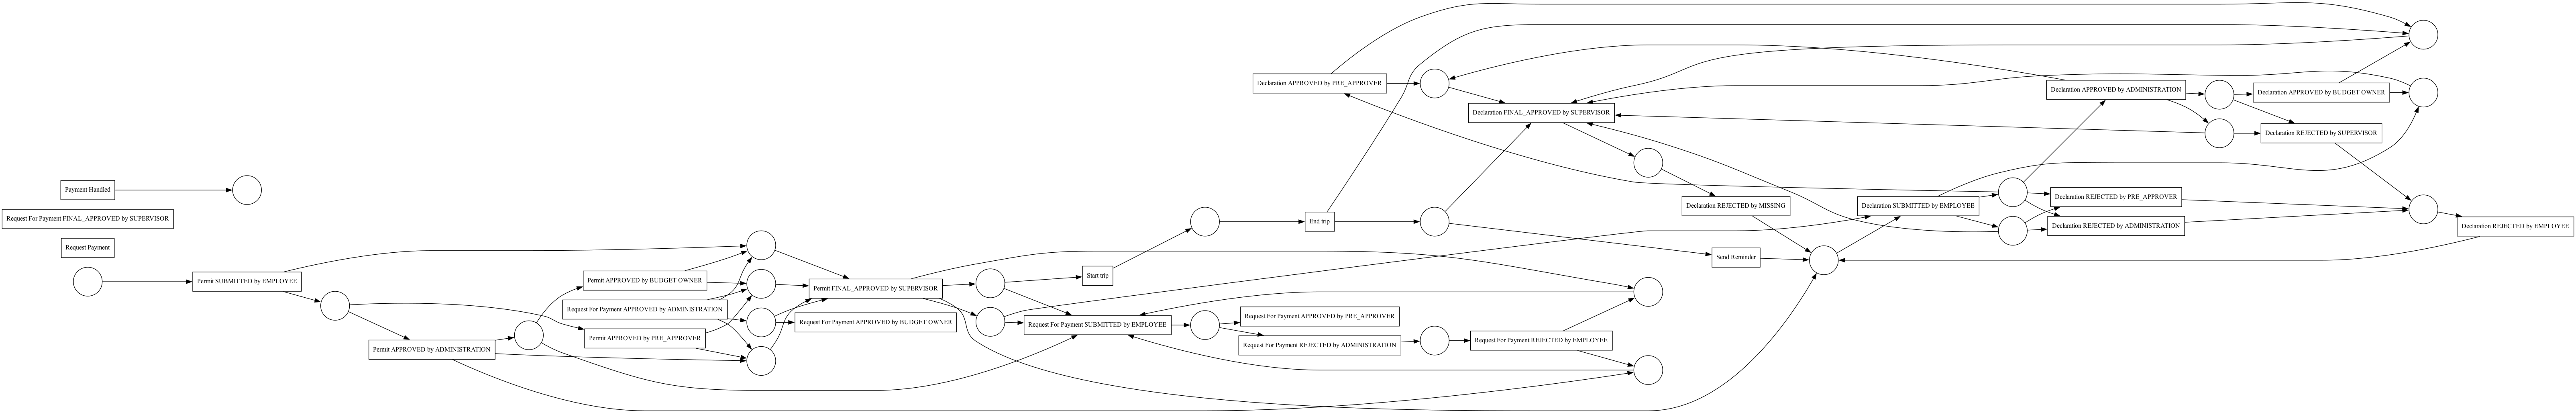

In [13]:
# alpha miner - net (places and transactions)
# general way to visualize net or tree or graph in pm4py - pm4py.view_{petri_net/tree/...}
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(trace_log)
pm4py.view_petri_net(net)

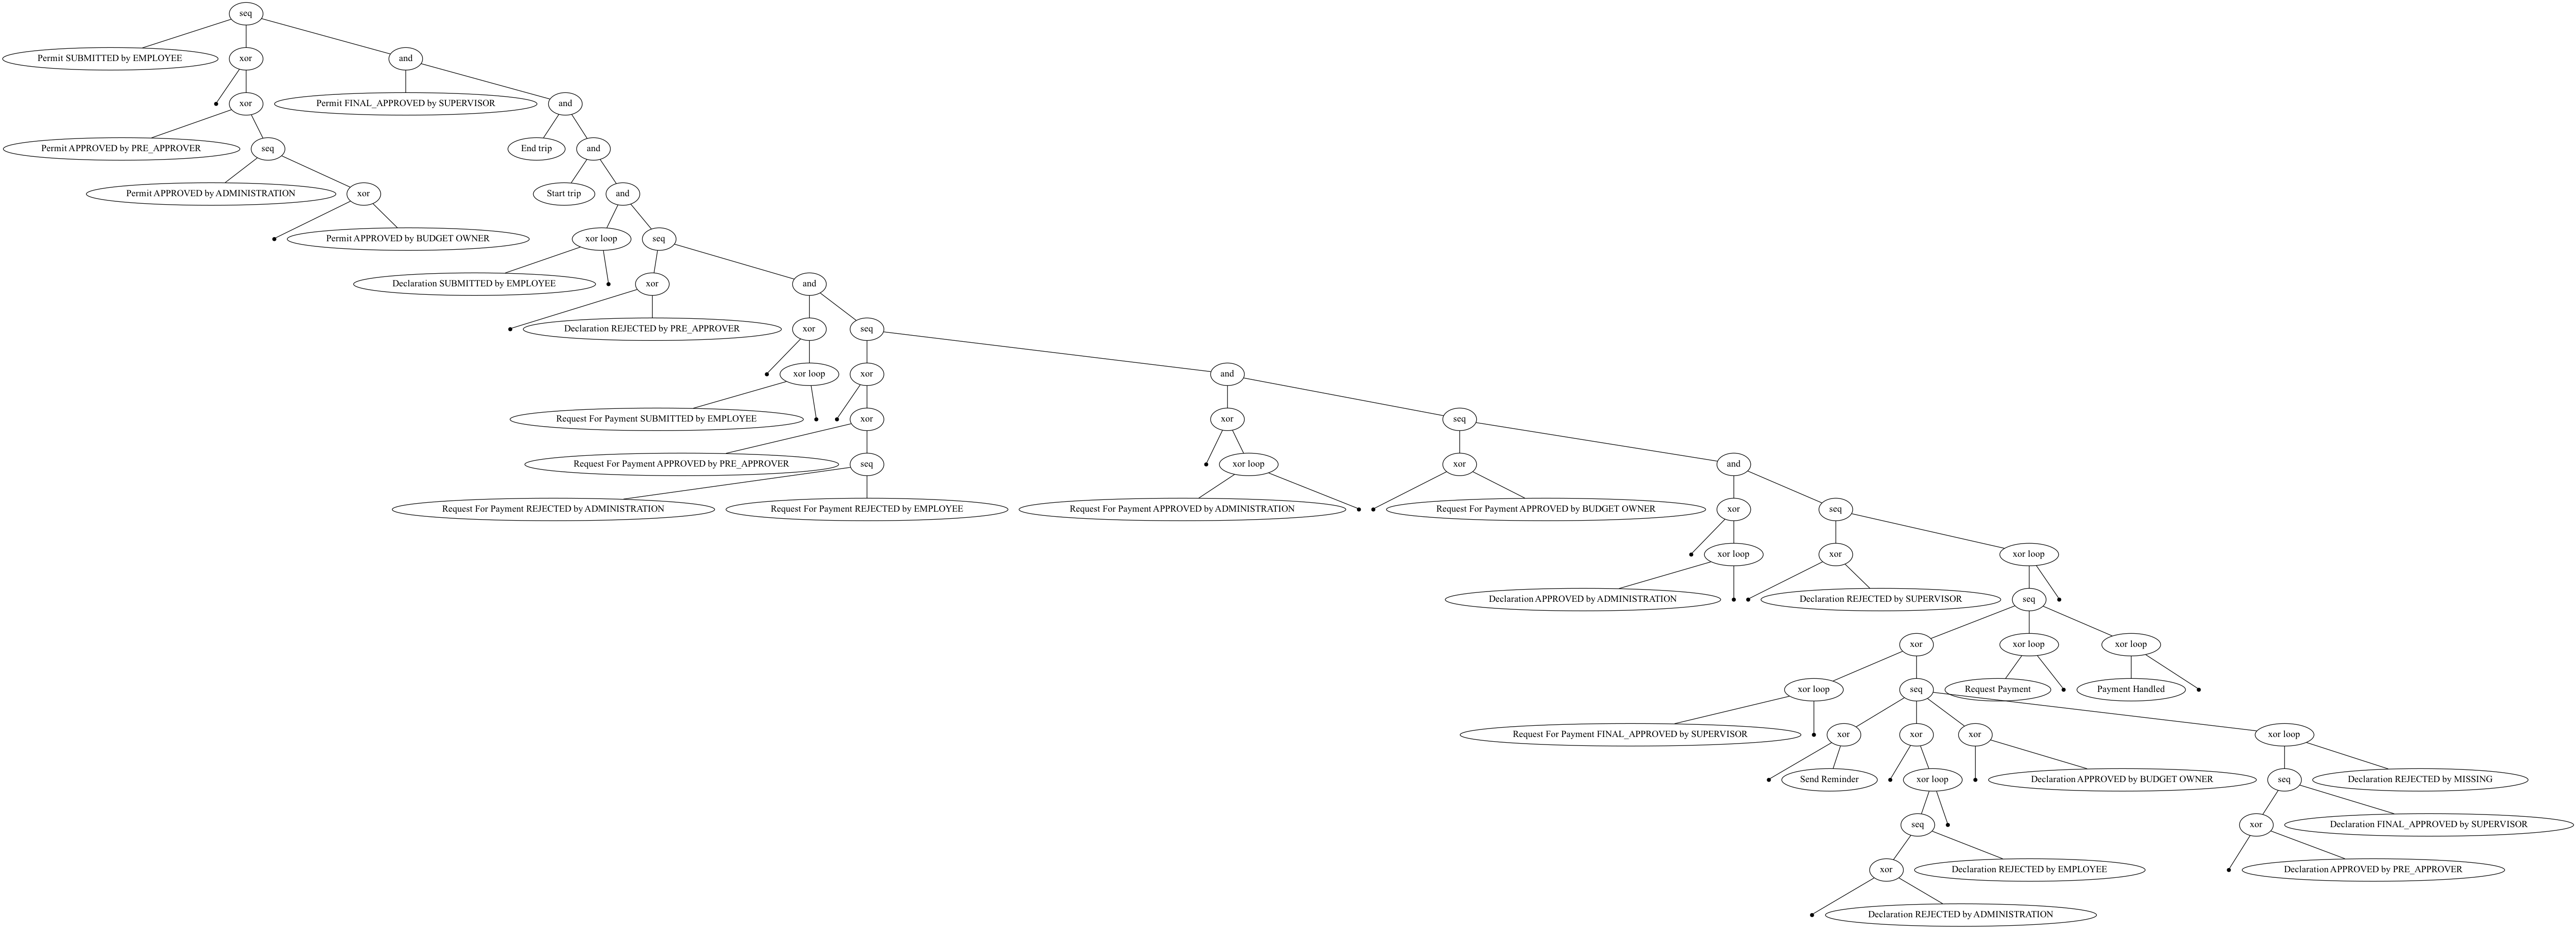

In [14]:
# inductive miner algoritham, we can plot perocess tree, and can save the net same as alpha miner ((places and transactions))
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(trace_log)
tree = pm4py.discover_process_tree_inductive(trace_log)
pm4py.view_process_tree(tree)

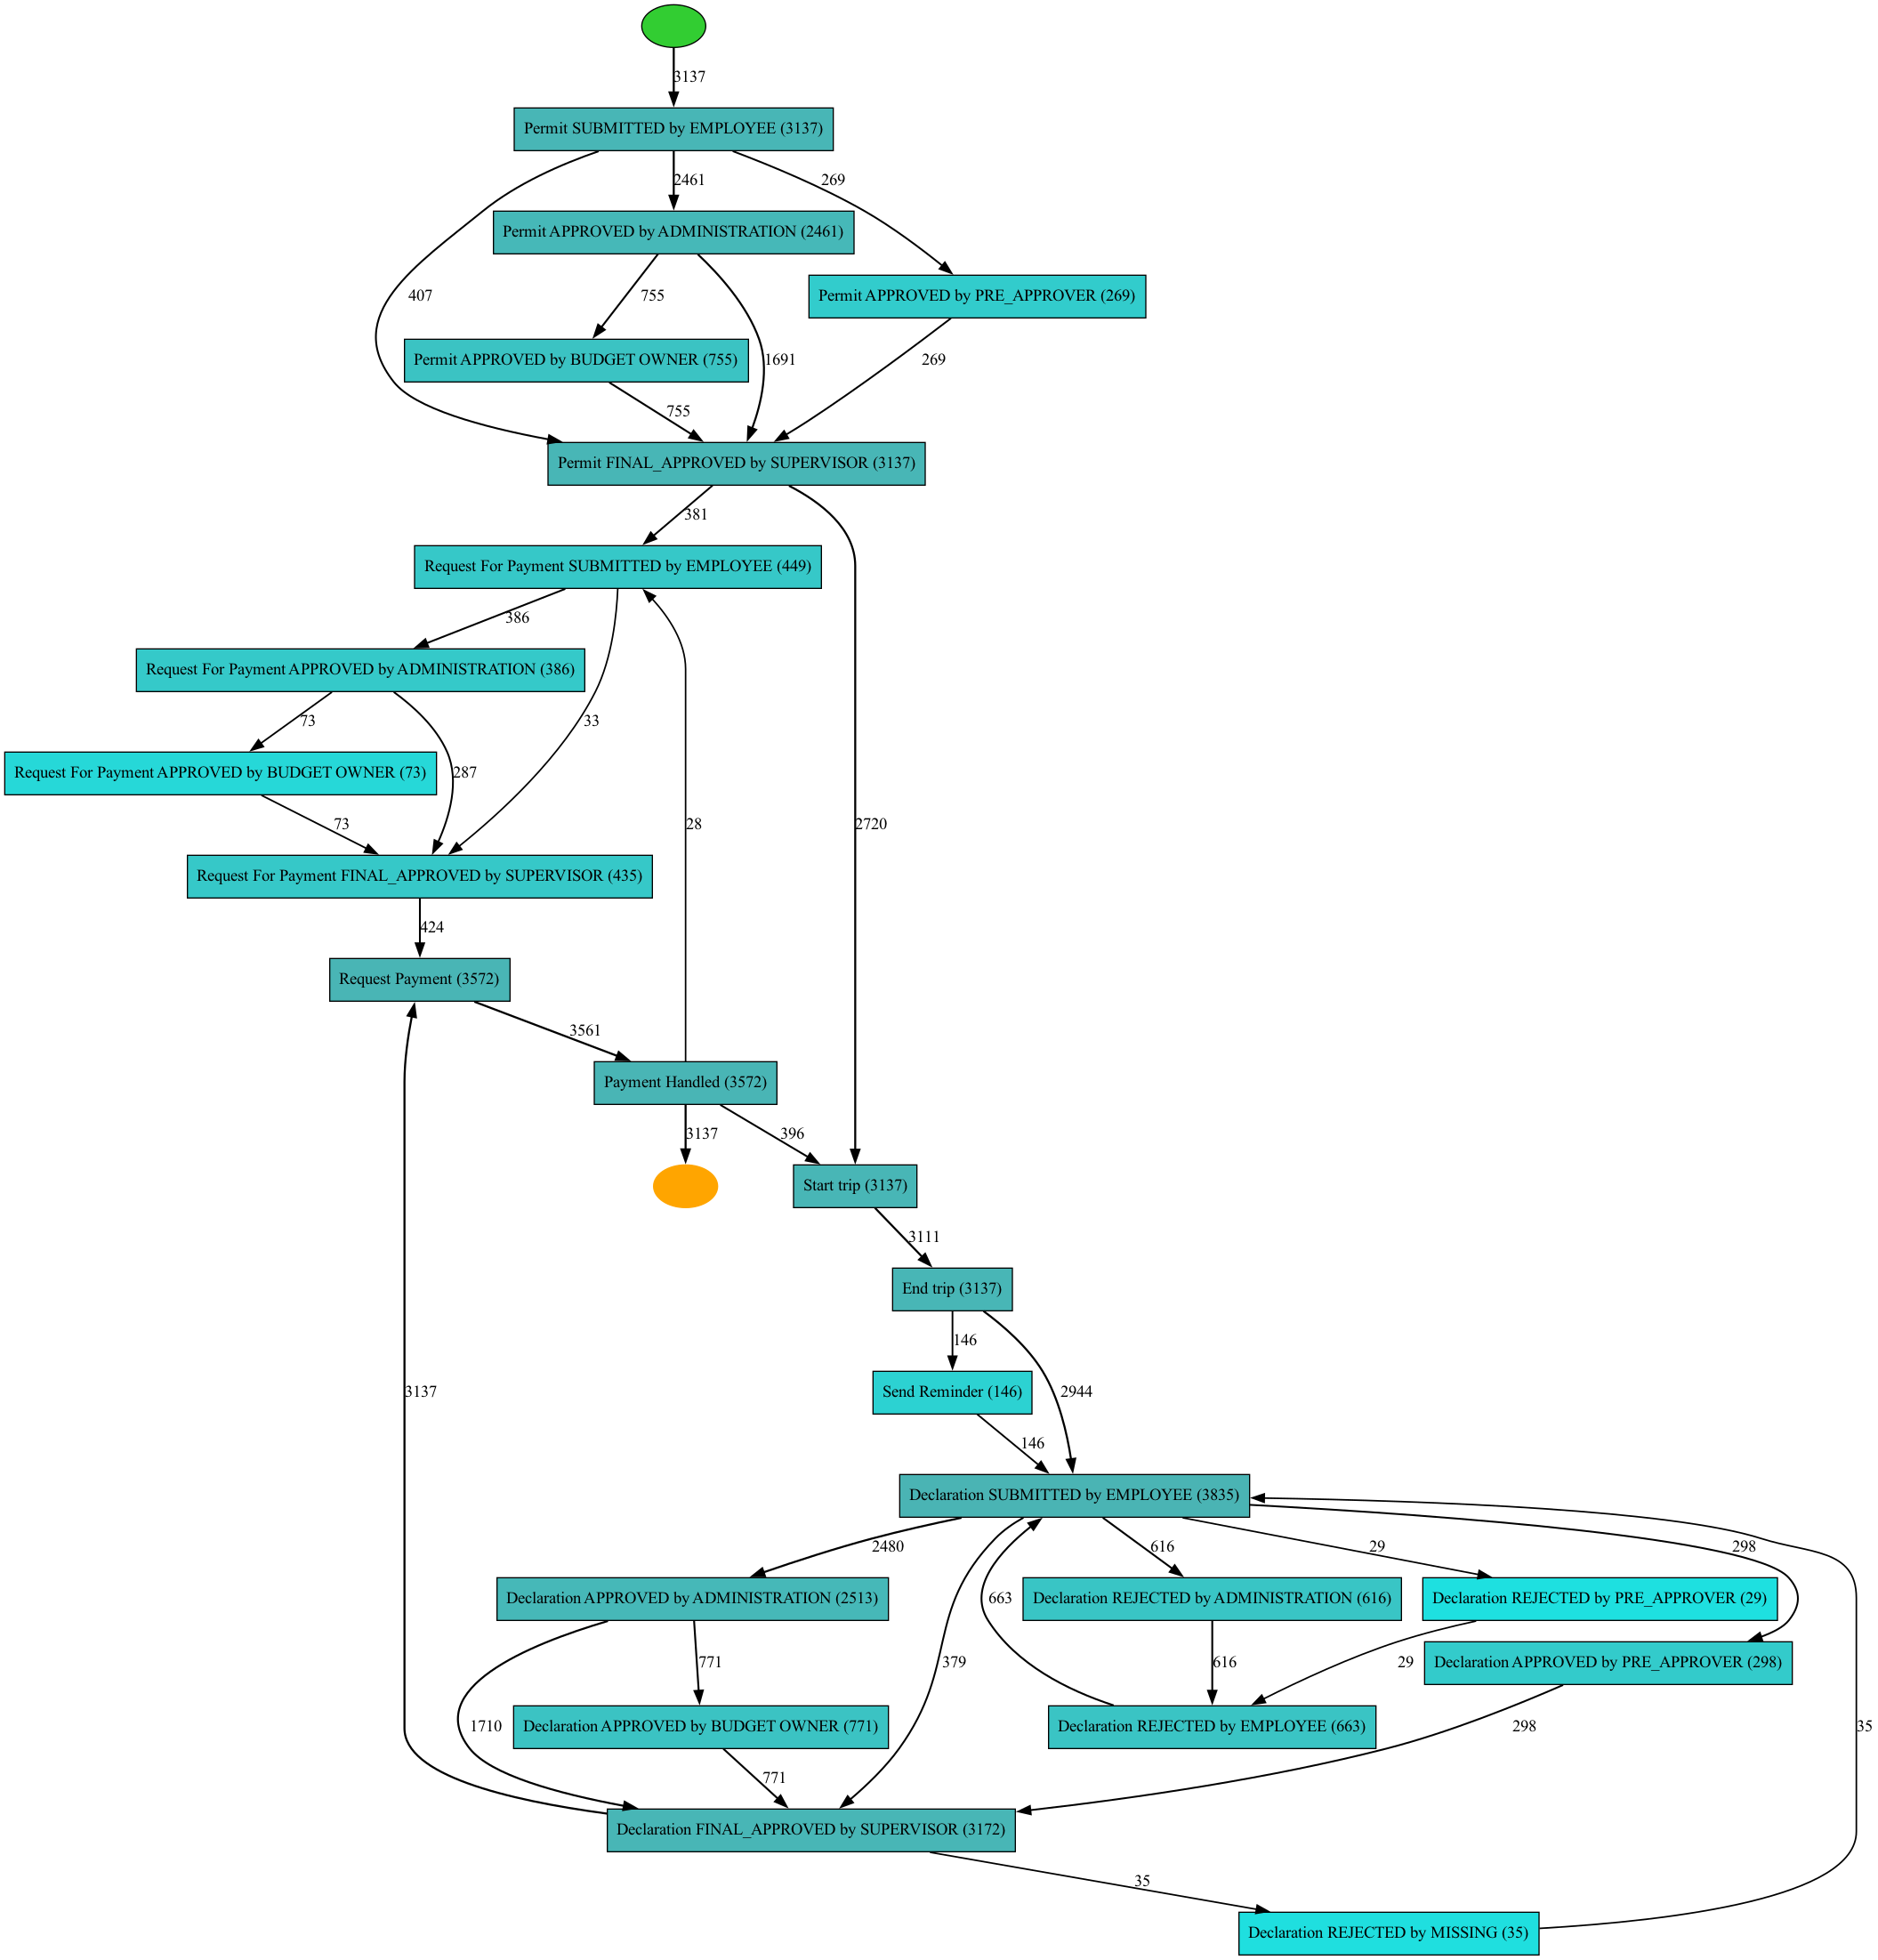

In [21]:
# huristic miner
heu_net = pm4py.discover_heuristics_net(trace_log, dependency_threshold=0.95)
pm4py.view_heuristics_net(heu_net)

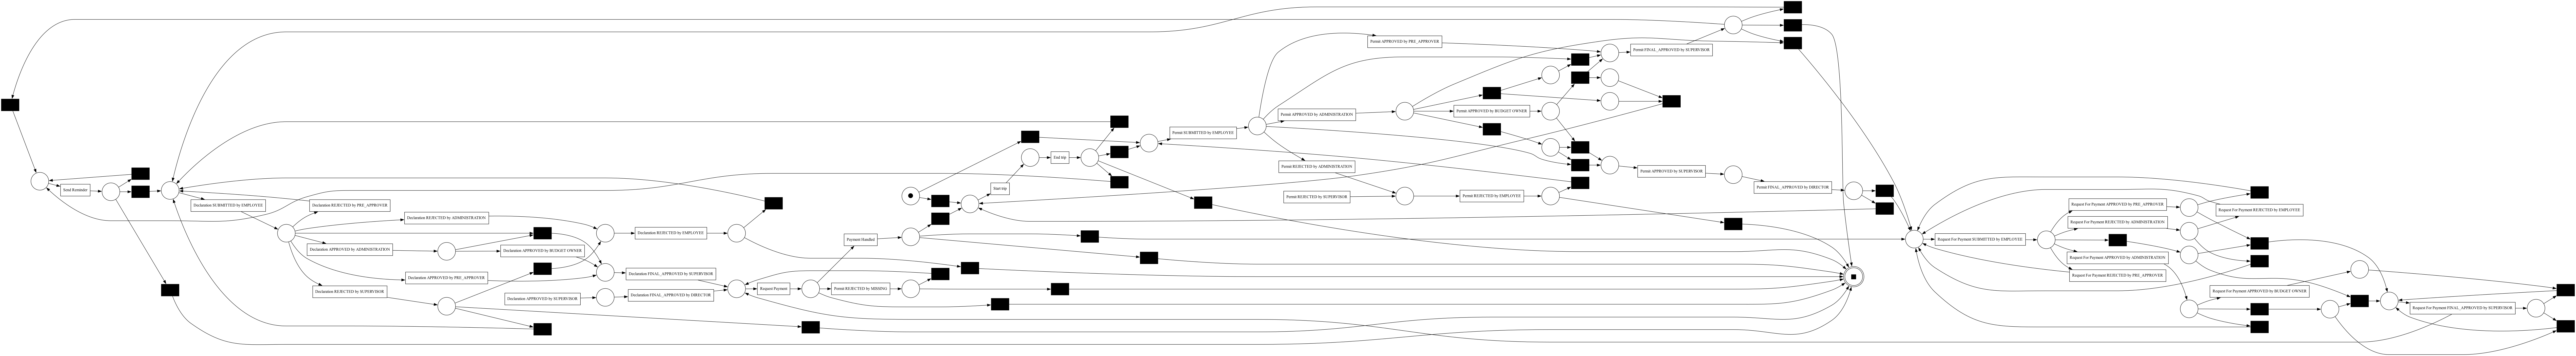

In [48]:
# create and view petri net of huristic miner
net, im, fm = pm4py.discover_petri_net_heuristics(trace_log, dependency_threshold=0.99)
pm4py.view_petri_net(net, im, fm)

In [17]:
# plotting directly followes graph
# dfg, start_activities, end_activities = pm4py.discover_dfg(trace_log) # dfg with edge number
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(trace_log) # with duration
# pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'perf_dfg.svg') # to save image, performance dfg can only be saved and then viewed  
# pm4py.view_dfg(performance_dfg, start_activities, end_activities)

# Basic Data Analysis (Python)

In [241]:
# read permit file, select columns
permits = pd.read_csv('../data/BPIC2020_CSV/TravelPermits.csv')
permits = permits[['case', 'event', 'startTime', 'completeTime','org:resource', 'event_id', 'org:role','RequestedAmount_0','OrganizationalEntity','Overspent','OverspentAmount','TotalDeclared']]
permits['startTime'] = pd.to_datetime(permits['startTime'])
permits['completeTime'] = pd.to_datetime(permits['completeTime'])
permits.head()

/var/folders/5_/kbn_rbxx7r58wh4vqxvfhny40000gn/T/ipykernel_19180/960706395.py:2: DtypeWarning:

Columns (4,5,6,7,9,10,11,12,13,14,15,16,17,18,20,23,24,25,26,31,33,34,35,36,37,46,47,48,49,50,51,52,53,54,58,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,80,82,83,84,85,87,89,92,95,96,98,100,101,102,103,104,105,107,108,109,110,112,113,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,139,140,141,142,143,144,145,147,148,154,155,156,157,158,159,160,161,163,164,165,166,167,168,169,170) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/5_/kbn_rbxx7r58wh4vqxvfhny40000gn/T/ipykernel_19180/960706395.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5_/kbn_rbxx7r58

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561


## Basic Feature Engineering for Data Analysis

In [242]:
# time to complete the activity
permits['act_completionTime'] = permits['completeTime'] - permits['startTime']
permits.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561,0 days
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days


In [243]:
# get minimum time for earch trace (when trace started)
temp_df = pd.DataFrame(permits.groupby(['case'])['startTime'].min())
temp_df['index'] = temp_df.index
temp_df.reset_index(drop=True, inplace=True)
temp_df.columns = ['startTime_min','case']
temp_df.head()

# merge with permits
permits = permits.merge(temp_df,on=['case'])
permits.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime,startTime_min
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05


In [244]:
# get max time for earch trace (when trace ended)
temp_df = pd.DataFrame(permits.groupby(['case'])['completeTime'].max())
temp_df['index'] = temp_df.index
temp_df.reset_index(drop=True, inplace=True)
temp_df.columns = ['completeTime_max','case']
temp_df.head()

# merge with permits
permits = permits.merge(temp_df,on=['case'])
permits.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime,startTime_min,completeTime_max
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53


In [245]:
# calculate trace time
permits['processCompletionTime']=permits['completeTime_max']-permits['startTime_min']
permits.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime,startTime_min,completeTime_max,processCompletionTime
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53


In [246]:
# calculate time taken between activities
act_time_taken=[]
for name,group in permits.groupby(['case'],sort=False):
    act_time_taken.append([name,0])
    for i in range(len(group)-1):
        st_time_1 = group.iloc[i]['startTime']
        st_time_2 = group.iloc[i+1]['startTime']
        diff = st_time_2-st_time_1
        act_time_taken.append([name,diff])

time_diff_df = pd.DataFrame(act_time_taken,columns=['case','act_time_diff'])

# add with permits
permits['next_act_time_diff'] = time_diff_df['act_time_diff']

permits.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime,startTime_min,completeTime_max,processCompletionTime,next_act_time_diff
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53,0
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53,0 days 00:00:00
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53,183 days 13:32:10
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53,0 days 00:00:18
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,56,organizational unit 65458,False,0.0,39.664561,0 days,2016-10-05,2017-04-13 17:30:53,190 days 17:30:53,1 days 00:05:46


## Sperating trace and event attributes

In [248]:
trace_df = permits.groupby('case').agg({'RequestedAmount_0':'first', 'OrganizationalEntity':'first','Overspent':'first','OverspentAmount':'first',
                         'TotalDeclared':'first','act_completionTime':'first','startTime_min':'first','completeTime_max':'first','processCompletionTime':'first'}).reset_index()
trace_df.head()

,case,RequestedAmount_0,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,act_completionTime,startTime_min,completeTime_max,processCompletionTime
0,travel permit 10022,395,organizational unit 65466,False,-50.662542,683.176706,0 days,2018-02-20 13:51:27,2018-04-23 17:31:11,62 days 03:39:44
1,travel permit 10040,2129.846048886792,organizational unit 65466,False,-646.643989,2655.207272,0 days,2018-02-20 13:53:11,2018-05-17 17:31:34,86 days 03:38:23
2,travel permit 10060,None,organizational unit 65458,False,0.000000,0.000000,0 days,2018-02-20 17:29:10,2018-11-01 06:00:45,253 days 12:31:35
3,travel permit 10066,79,organizational unit 65460,False,-18.925474,71.195831,0 days,2018-02-21 16:28:17,2018-03-01 17:31:26,8 days 01:03:09
4,travel permit 10077,648,organizational unit 65455,False,-1373.918112,658.505131,0 days,2018-02-22 12:53:59,2018-07-19 17:32:03,147 days 04:38:04


In [249]:
events_df = permits[['case', 'event', 'startTime', 'completeTime','org:resource', 'event_id', 'org:role','next_act_time_diff']]
events_df.head()

,case,event,startTime,completeTime,org:resource,event_id,org:role,next_act_time_diff
0,travel permit 76455,Start trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_6,EMPLOYEE,0
1,travel permit 76455,End trip,2016-10-05 00:00:00,2016-10-05 00:00:00,STAFF MEMBER,rv_travel permit 76455_7,EMPLOYEE,0 days 00:00:00
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10,2017-04-06 13:32:10,STAFF MEMBER,st_step 76459_0,EMPLOYEE,183 days 13:32:10
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28,2017-04-06 13:32:28,STAFF MEMBER,st_step 76460_0,SUPERVISOR,0 days 00:00:18
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14,2017-04-07 13:38:14,STAFF MEMBER,st_step 76461_0,EMPLOYEE,1 days 00:05:46


## Visualization (if Needed)

In [251]:
temp = pd.DataFrame(permits[['startTime','OrganizationalEntity','TotalDeclared']]).fillna(0)
temp

,startTime,OrganizationalEntity,TotalDeclared
0,2016-10-05 00:00:00,organizational unit 65458,39.664561
1,2016-10-05 00:00:00,organizational unit 65458,39.664561
2,2017-04-06 13:32:10,organizational unit 65458,39.664561
3,2017-04-06 13:32:28,organizational unit 65458,39.664561
4,2017-04-07 13:38:14,organizational unit 65458,39.664561
...,...,...,...
86576,2018-12-30 15:11:51,organizational unit 65464,0.000000
86577,2019-01-02 00:00:00,organizational unit 65464,0.000000
86578,2019-01-02 09:11:23,organizational unit 65464,0.000000
86579,2019-01-07 14:03:29,organizational unit 65464,0.000000


In [263]:
# count vs totaldeclared nex month
temp = permits[permits['OrganizationalEntity']=='organizational unit 65454']
temp = temp[temp['startTime'].dt.year==2018]
temp['month'] = temp['startTime'].dt.month
temp = temp.groupby('month').agg({'TotalDeclared':'sum', 
                         'OrganizationalEntity':'count'}).reset_index()
temp.columns = ['month','TotalDeclared','Application count']
temp.head()

,month,TotalDeclared,Application count
0,1,203329.838068,236
1,2,440217.357573,415
2,3,805349.516767,648
3,4,787248.917326,705
4,5,834996.513276,719


In [264]:
temp['TotalDeclared']=temp['TotalDeclared'].shift(-1)
temp = temp.iloc[:-1,:]
temp.head()

,month,TotalDeclared,Application count
0,1,4.402174e+05,236
1,2,8.053495e+05,415
2,3,7.872489e+05,648
3,4,8.349965e+05,705
4,5,1.088640e+06,719


In [265]:
temp.corr(method='pearson')

,month,TotalDeclared,Application count
month,1.000000,-0.147075,0.524904
TotalDeclared,-0.147075,1.000000,0.412895
Application count,0.524904,0.412895,1.000000


In [266]:
fig = px.scatter(temp, x="Application count", y="TotalDeclared")
fig.show()

In [267]:
# monthly organizational variations
temp = permits[permits['startTime'].dt.year==2018]
temp = temp[temp['OrganizationalEntity']!='organizational unit 65466'] # an outlier, decalted amount in million
temp['month'] = temp['startTime'].dt.month
temp = temp.groupby([pd.Grouper(key="startTime", freq='M'),'OrganizationalEntity']).sum().reset_index()
temp.head()

,startTime,OrganizationalEntity,Overspent,OverspentAmount,TotalDeclared,month
0,2018-01-31,organizational unit 65454,72,-61293.337396,203329.838068,236
1,2018-01-31,organizational unit 65455,151,-143901.382017,590775.022946,517
2,2018-01-31,organizational unit 65456,167,-47010.586053,452872.961148,459
3,2018-01-31,organizational unit 65457,46,11728.659092,108544.147712,97
4,2018-01-31,organizational unit 65458,159,-296984.322034,594817.434915,738


In [268]:
# plotting in plotly
fig = px.line(temp, x="startTime", y="TotalDeclared",color='OrganizationalEntity')
fig.show()

# plotting in seaborn 
# # create figure object and axis and pass axis in sns plot
# fig,ax = plt.subplots(figsize=(14,7))
# # Group variable using "hue" that will produce lines with different colors
# sns.lineplot(x="startTime", y="TotalDeclared", hue='OrganizationalEntity' , data=temp,ax=ax)
# plt.show()

## EXTRA

In [269]:
permits_event = permits.loc[:,['case','event']]
permits_event

,case,event
0,travel permit 76455,Start trip
1,travel permit 76455,End trip
2,travel permit 76455,Permit SUBMITTED by EMPLOYEE
3,travel permit 76455,Permit FINAL_APPROVED by SUPERVISOR
4,travel permit 76455,Declaration SUBMITTED by EMPLOYEE
...,...,...
86576,travel permit 13108,Permit APPROVED by ADMINISTRATION
86577,travel permit 13108,Start trip
86578,travel permit 13108,Permit APPROVED by SUPERVISOR
86579,travel permit 13108,Permit FINAL_APPROVED by DIRECTOR


In [270]:
grouped_event = permits_event.groupby(["case", "event"]).size()
grouped_event

case                 event                                           
travel permit 10022  Declaration APPROVED by ADMINISTRATION              2
                     Declaration APPROVED by BUDGET OWNER                2
                     Declaration FINAL_APPROVED by SUPERVISOR            2
                     Declaration SUBMITTED by EMPLOYEE                   2
                     End trip                                            1
                                                                        ..
travel permit 9984   Request For Payment FINAL_APPROVED by SUPERVISOR    4
                     Request For Payment SUBMITTED by EMPLOYEE           4
                     Request Payment                                     5
                     Send Reminder                                       1
                     Start trip                                          1
Length: 76091, dtype: int64

In [271]:
flattened_df = grouped_event.unstack().fillna(0)
flattened_df.head()

event,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,Declaration APPROVED by PRE_APPROVER,Declaration APPROVED by SUPERVISOR,Declaration FINAL_APPROVED by DIRECTOR,Declaration FINAL_APPROVED by SUPERVISOR,Declaration REJECTED by ADMINISTRATION,Declaration REJECTED by BUDGET OWNER,Declaration REJECTED by DIRECTOR,Declaration REJECTED by EMPLOYEE,...,Request For Payment REJECTED by BUDGET OWNER,Request For Payment REJECTED by EMPLOYEE,Request For Payment REJECTED by MISSING,Request For Payment REJECTED by PRE_APPROVER,Request For Payment REJECTED by SUPERVISOR,Request For Payment SAVED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,Request Payment,Send Reminder,Start trip
case,,,,,,,,,,,,,,,,,,,,,
travel permit 10022,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
travel permit 10040,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0
travel permit 10060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
travel permit 10066,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
travel permit 10077,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [272]:
t = pd.DataFrame(flattened_df.sum())

In [273]:
t['event'] = t.index

In [274]:
t.reset_index(drop=True, inplace=True)

In [275]:
t

,0,event
0,4782.0,Declaration APPROVED by ADMINISTRATION
1,1717.0,Declaration APPROVED by BUDGET OWNER
2,561.0,Declaration APPROVED by PRE_APPROVER
3,221.0,Declaration APPROVED by SUPERVISOR
4,217.0,Declaration FINAL_APPROVED by DIRECTOR
5,5641.0,Declaration FINAL_APPROVED by SUPERVISOR
6,1476.0,Declaration REJECTED by ADMINISTRATION
7,39.0,Declaration REJECTED by BUDGET OWNER
8,4.0,Declaration REJECTED by DIRECTOR
9,1688.0,Declaration REJECTED by EMPLOYEE


In [13]:
permits_gp = permits.groupby('case')

In [24]:
for case,grp in permits_gp:
    print(grp['completeTime'].iloc[-1] - grp['startTime'].iloc[0])
    break

62 days 03:39:44
